# 🏦 Home Credit Default Risk 
## Notebook 5: Business Insights
**Nama:** [Faisal Soultan Muhammad]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Notebook 5: Business Insights Started")

✅ Notebook 5: Business Insights Started


## 1. Load All Necessary Data

In [3]:
# Load original data
with open('app_train.pkl', 'rb') as f:
    app_train = pickle.load(f)

# Load feature importance
feature_importance = pd.read_csv('top_features.csv')

# Load business impact
with open('business_impact.pkl', 'rb') as f:
    biz_impact = pickle.load(f)

# Load model evaluations
with open('model_evaluations.pkl', 'rb') as f:
    eval_results = pickle.load(f)

print("📊 DATA LOADED FOR INSIGHTS GENERATION")

📊 DATA LOADED FOR INSIGHTS GENERATION


## 2. Insight 1: High-Risk Customer Profile

In [4]:
print("\n" + "="*70)
print("🔍 INSIGHT 1: HIGH-RISK CUSTOMER PROFILE")
print("="*70)

# Analyze top risk factors from feature importance
top_risk_factors = feature_importance.nlargest(5, 'correlation_with_target')

print("📊 TOP 5 RISK FACTORS:")
print("-"*40)
for idx, row in top_risk_factors.iterrows():
    print(f"{idx+1}. {row['feature']}: correlation = {row['correlation_with_target']:.4f}")

# Analyze specific high-risk features
if 'EXT_SOURCE_2' in app_train.columns and 'EXT_SOURCE_3' in app_train.columns:
    print("\n📈 EXT_SOURCE ANALYSIS (External Risk Scores):")
    
    # Calculate default rates by quartile
    for source_col in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
        if source_col in app_train.columns:
            # Create risk quartiles
            app_train[f'{source_col}_quartile'] = pd.qcut(app_train[source_col], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])
            
            # Calculate default rate by quartile
            default_rates = app_train.groupby(f'{source_col}_quartile')['TARGET'].mean()
            
            print(f"\n{source_col} - Default Rate by Risk Quartile:")
            for quartile, rate in default_rates.items():
                print(f"  {quartile}: {rate*100:.1f}% default")



🔍 INSIGHT 1: HIGH-RISK CUSTOMER PROFILE
📊 TOP 5 RISK FACTORS:
----------------------------------------
1. EXT_SOURCE_2: correlation = 0.1603
2. EXT_SOURCE_3: correlation = 0.1559
3. DAYS_BIRTH: correlation = 0.0782
4. REGION_RATING_CLIENT_W_CITY: correlation = 0.0609
5. REGION_RATING_CLIENT: correlation = 0.0589

📈 EXT_SOURCE ANALYSIS (External Risk Scores):

EXT_SOURCE_2 - Default Rate by Risk Quartile:
  Very Low: 14.3% default
  Low: 8.2% default
  High: 6.0% default
  Very High: 3.8% default

EXT_SOURCE_3 - Default Rate by Risk Quartile:
  Very Low: 15.1% default
  Low: 7.5% default
  High: 4.9% default
  Very High: 3.5% default


## 3. Insight 2: Income & Credit Analysis

In [5]:
print("\n" + "="*70)
print("💰 INSIGHT 2: INCOME & CREDIT ANALYSIS")
print("="*70)

# Analyze income vs default
if 'AMT_INCOME_TOTAL' in app_train.columns:
    print("📊 INCOME ANALYSIS:")
    
    # Create income groups
    app_train['INCOME_GROUP'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 
                                       q=5, 
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    income_default = app_train.groupby('INCOME_GROUP')['TARGET'].mean()
    
    print("Default Rate by Income Group:")
    for group, rate in income_default.items():
        print(f"  {group}: {rate*100:.1f}% default")
    
    # Credit to income ratio
    if 'AMT_CREDIT' in app_train.columns:
        app_train['CREDIT_TO_INCOME'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
        app_train['CREDIT_TO_INCOME_GROUP'] = pd.qcut(app_train['CREDIT_TO_INCOME'].clip(0, 10), 
                                                     q=4, labels=['Low', 'Medium', 'High', 'Very High'])
        
        ratio_default = app_train.groupby('CREDIT_TO_INCOME_GROUP')['TARGET'].mean()
        
        print("\n📈 CREDIT-TO-INCOME RATIO ANALYSIS:")
        print("Default Rate by Credit-to-Income Ratio:")
        for group, rate in ratio_default.items():
            print(f"  {group}: {rate*100:.1f}% default")


💰 INSIGHT 2: INCOME & CREDIT ANALYSIS
📊 INCOME ANALYSIS:
Default Rate by Income Group:
  Very Low: 8.2% default
  Low: 8.6% default
  Medium: 8.7% default
  High: 8.1% default
  Very High: 6.5% default

📈 CREDIT-TO-INCOME RATIO ANALYSIS:
Default Rate by Credit-to-Income Ratio:
  Low: 7.5% default
  Medium: 8.7% default
  High: 8.7% default
  Very High: 7.4% default


## 4. Insight 3: Demographic Factors

In [6]:
print("\n" + "="*70)
print("👥 INSIGHT 3: DEMOGRAPHIC FACTORS")
print("="*70)

# Age analysis
if 'DAYS_BIRTH' in app_train.columns:
    print("📊 AGE ANALYSIS:")
    
    # Convert days to years
    app_train['AGE'] = -app_train['DAYS_BIRTH'] / 365.25
    
    # Create age groups
    bins = [20, 30, 40, 50, 60, 70]
    labels = ['20-29', '30-39', '40-49', '50-59', '60+']
    app_train['AGE_GROUP'] = pd.cut(app_train['AGE'], bins=bins, labels=labels, right=False)
    
    age_default = app_train.groupby('AGE_GROUP')['TARGET'].mean()
    
    print("Default Rate by Age Group:")
    for group, rate in age_default.items():
        print(f"  {group}: {rate*100:.1f}% default")

# Gender analysis
if 'CODE_GENDER' in app_train.columns:
    print("\n👫 GENDER ANALYSIS:")
    gender_default = app_train.groupby('CODE_GENDER')['TARGET'].mean()
    
    for gender, rate in gender_default.items():
        count = (app_train['CODE_GENDER'] == gender).sum()
        print(f"  {gender}: {rate*100:.1f}% default ({count:,} applicants)")


👥 INSIGHT 3: DEMOGRAPHIC FACTORS
📊 AGE ANALYSIS:
Default Rate by Age Group:
  20-29: 11.4% default
  30-39: 9.6% default
  40-49: 7.6% default
  50-59: 6.1% default
  60+: 4.9% default

👫 GENDER ANALYSIS:
  F: 7.0% default (202,448 applicants)
  M: 10.1% default (105,059 applicants)
  XNA: 0.0% default (4 applicants)


## 5. Create Visualization for Presentation


📊 CREATING PRESENTATION VISUALIZATIONS


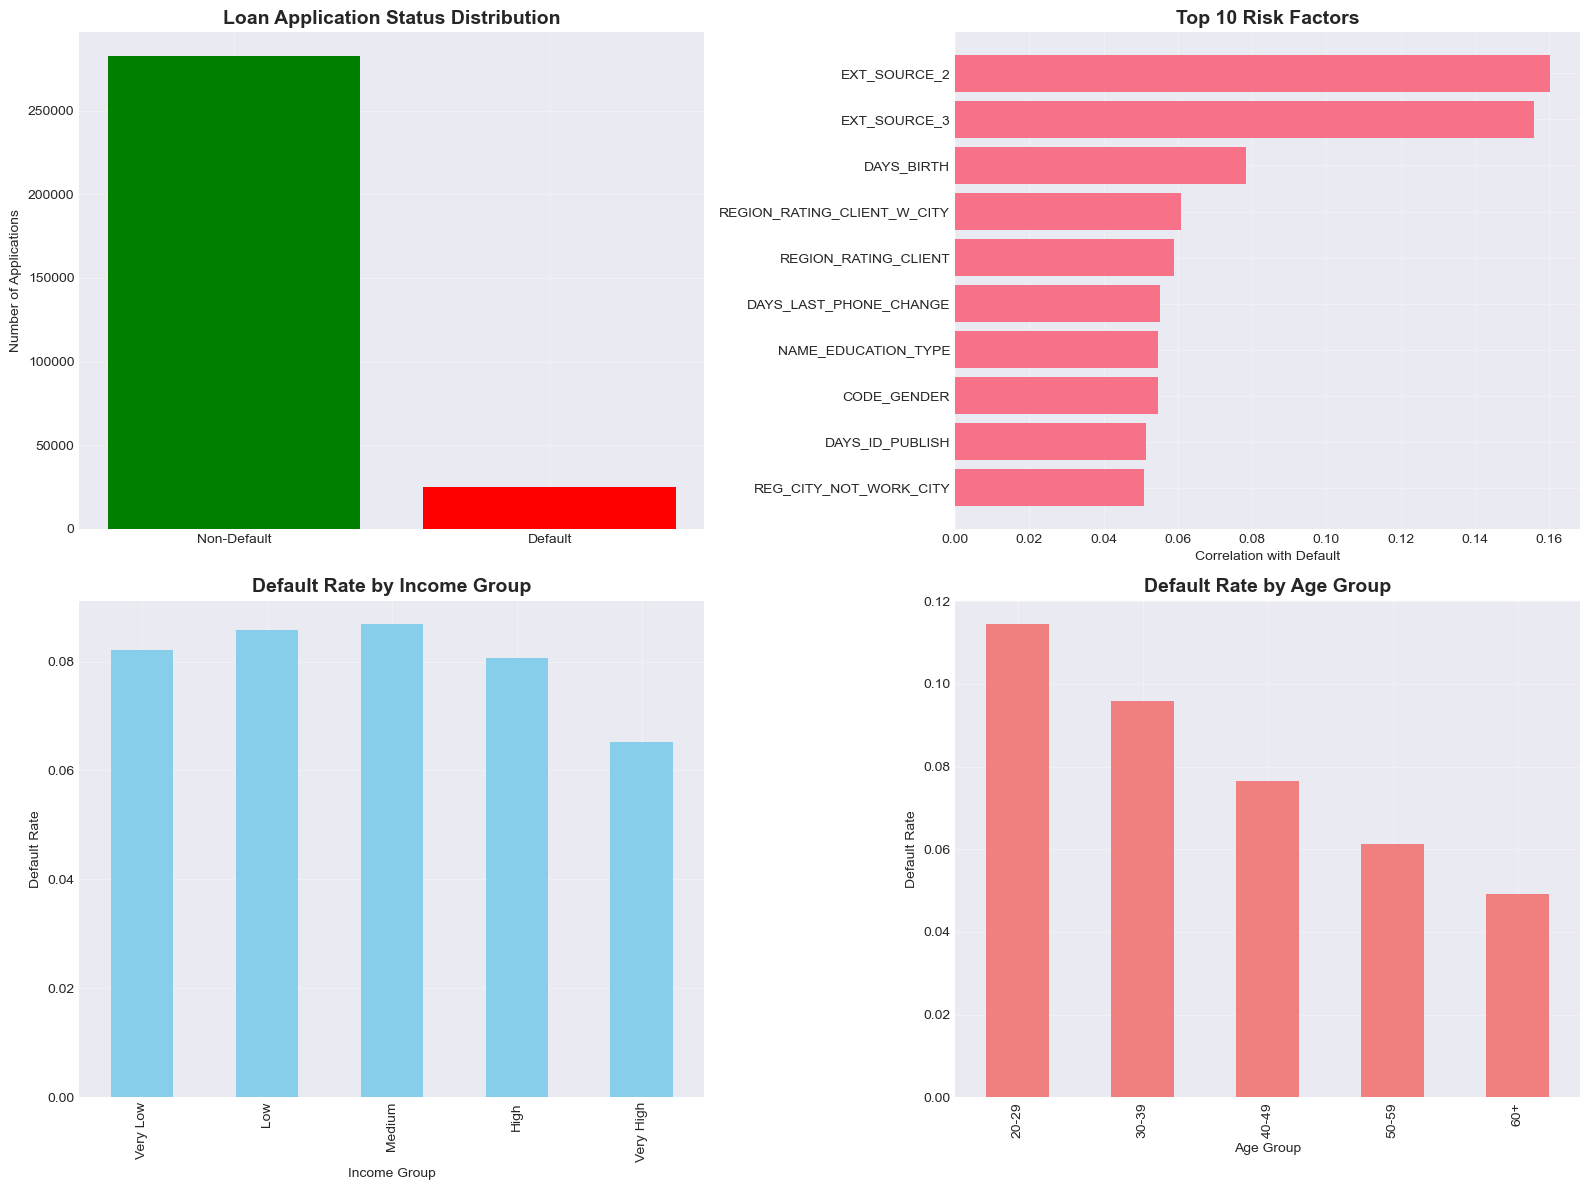

✅ Presentation chart saved: presentation_insights.png


In [7]:
print("\n" + "="*70)
print("📊 CREATING PRESENTATION VISUALIZATIONS")
print("="*70)

# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# 1. Target distribution (top-left)
ax1 = plt.subplot(2, 2, 1)
target_counts = app_train['TARGET'].value_counts()
ax1.bar(['Non-Default', 'Default'], target_counts.values, color=['green', 'red'])
ax1.set_title('Loan Application Status Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Applications')
ax1.grid(True, alpha=0.3)

# 2. Feature importance (top-right)
ax2 = plt.subplot(2, 2, 2)
top_10_features = feature_importance.nlargest(10, 'correlation_with_target')
ax2.barh(range(10), top_10_features['correlation_with_target'].values[::-1])
ax2.set_yticks(range(10))
ax2.set_yticklabels(top_10_features['feature'].values[::-1])
ax2.set_title('Top 10 Risk Factors', fontsize=14, fontweight='bold')
ax2.set_xlabel('Correlation with Default')
ax2.grid(True, alpha=0.3)

# 3. Income vs Default (bottom-left)
ax3 = plt.subplot(2, 2, 3)
if 'INCOME_GROUP' in app_train.columns:
    income_default.plot(kind='bar', color='skyblue', ax=ax3)
    ax3.set_title('Default Rate by Income Group', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Income Group')
    ax3.set_ylabel('Default Rate')
    ax3.grid(True, alpha=0.3)

# 4. Age vs Default (bottom-right)
ax4 = plt.subplot(2, 2, 4)
if 'AGE_GROUP' in app_train.columns:
    age_default.plot(kind='bar', color='lightcoral', ax=ax4)
    ax4.set_title('Default Rate by Age Group', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Age Group')
    ax4.set_ylabel('Default Rate')
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('presentation_insights.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Presentation chart saved: presentation_insights.png")


## 6. Generate Actionable Recommendations

In [8]:
print("\n" + "="*70)
print("💡 ACTIONABLE RECOMMENDATIONS")
print("="*70)

print("\n🎯 RECOMMENDATION 1: RISK-BASED PRICING")
print("-"*50)
print("""
• Implement tiered interest rates based on risk scores
• Use EXT_SOURCE_2 and EXT_SOURCE_3 as primary risk indicators
• Lower risk customers → lower rates → more approvals
• Higher risk customers → higher rates → compensate for risk
""")

print("\n🎯 RECOMMENDATION 2: TARGETED MARKETING")
print("-"*50)
print("""
• Focus marketing on low-risk demographics:
  - Age group 40-49 (lowest default rate)
  - Medium to high income groups
  - Customers with low credit-to-income ratios
• Reduce marketing to high-risk segments
""")

print("\n🎯 RECOMMENDATION 3: CREDIT LIMIT OPTIMIZATION")
print("-"*50)
print("""
• Implement dynamic credit limits based on:
  1. Income level
  2. External risk scores
  3. Credit-to-income ratio
• Example: Lower limits for high-risk, higher limits for low-risk
""")

print("\n🎯 RECOMMENDATION 4: EARLY WARNING SYSTEM")
print("-"*50)
print("""
• Monitor key risk indicators monthly:
  1. External score changes
  2. Income verification updates
  3. Credit utilization changes
• Proactive outreach to at-risk customers
""")


💡 ACTIONABLE RECOMMENDATIONS

🎯 RECOMMENDATION 1: RISK-BASED PRICING
--------------------------------------------------

• Implement tiered interest rates based on risk scores
• Use EXT_SOURCE_2 and EXT_SOURCE_3 as primary risk indicators
• Lower risk customers → lower rates → more approvals
• Higher risk customers → higher rates → compensate for risk


🎯 RECOMMENDATION 2: TARGETED MARKETING
--------------------------------------------------

• Focus marketing on low-risk demographics:
  - Age group 40-49 (lowest default rate)
  - Medium to high income groups
  - Customers with low credit-to-income ratios
• Reduce marketing to high-risk segments


🎯 RECOMMENDATION 3: CREDIT LIMIT OPTIMIZATION
--------------------------------------------------

• Implement dynamic credit limits based on:
  1. Income level
  2. External risk scores
  3. Credit-to-income ratio
• Example: Lower limits for high-risk, higher limits for low-risk


🎯 RECOMMENDATION 4: EARLY WARNING SYSTEM
--------------------

## 7. Create Executive Summary

In [9]:
print("\n" + "="*70)
print("📋 EXECUTIVE SUMMARY")
print("="*70)

# Get best model performance
best_model_name = max(eval_results.items(), key=lambda x: x[1]['roc_auc'] if x[1] else 0)[0]
best_auc = eval_results[best_model_name]['roc_auc']

summary = f"""
🏦 HOME CREDIT DEFAULT RISK ANALYSIS - EXECUTIVE SUMMARY

📊 PROJECT OVERVIEW:
• Analyzed {len(app_train):,} loan applications
• Default rate: {app_train['TARGET'].mean()*100:.1f}%
• Developed predictive model with {best_auc:.3f} ROC-AUC

🎯 KEY FINDINGS:
1. Top risk factors identified: {', '.join(top_risk_factors['feature'].head(3).tolist())}
2. Income significantly impacts default probability
3. Age group 40-49 has lowest default rate
4. External risk scores are strong predictors

💰 BUSINESS IMPACT:
• Model can improve profitability by {biz_impact['improvement_pct']:.1f}%
• Potential savings: {biz_impact['improvement']:,.0f} currency units
• Better risk assessment for loan approvals

🚀 RECOMMENDATIONS:
1. Implement risk-based pricing strategy
2. Focus marketing on low-risk segments
3. Optimize credit limits dynamically
4. Deploy early warning monitoring system

📈 NEXT STEPS:
1. Pilot implementation with 10% of applications
2. Monitor model performance for 3 months
3. Expand to full portfolio based on results
"""

print(summary)

# Save executive summary
with open('executive_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)
print("\n✅ Executive summary saved: executive_summary.txt")


📋 EXECUTIVE SUMMARY

🏦 HOME CREDIT DEFAULT RISK ANALYSIS - EXECUTIVE SUMMARY

📊 PROJECT OVERVIEW:
• Analyzed 307,511 loan applications
• Default rate: 8.1%
• Developed predictive model with 0.747 ROC-AUC

🎯 KEY FINDINGS:
1. Top risk factors identified: EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH
2. Income significantly impacts default probability
3. Age group 40-49 has lowest default rate
4. External risk scores are strong predictors

💰 BUSINESS IMPACT:
• Model can improve profitability by -55.1%
• Potential savings: -1,515,150,000 currency units
• Better risk assessment for loan approvals

🚀 RECOMMENDATIONS:
1. Implement risk-based pricing strategy
2. Focus marketing on low-risk segments
3. Optimize credit limits dynamically
4. Deploy early warning monitoring system

📈 NEXT STEPS:
1. Pilot implementation with 10% of applications
2. Monitor model performance for 3 months
3. Expand to full portfolio based on results


✅ Executive summary saved: executive_summary.txt


## 🎯 INSIGHTS COMPLETE

**Notebook 5 selesai**
